Importation des librairies utiles

In [184]:
from rtlsdr import RtlSdr
import matplotlib.pyplot as plt
import numpy as np
import wavio
import scipy
from scipy.integrate import cumtrapz

Enregistrement de 10 millisecondes de Radio Canada

In [166]:
def Enregistrement(FREQ, TEMPS):
    RATE = 1024000
    sdr = RtlSdr()
    sdr.sample_rate = RATE
    sdr.center_freq = FREQ
    sdr.gain = 'auto'
    samples = sdr.read_samples(RATE*TEMPS)
    sdr.close()
    return samples

Graphique de la densité spectrale de puissance

In [159]:
def PSD(SAMPLES):
    plt.psd(SAMPLES, NFFT=2 ** 14, Fs=1024000 / 1e6, Fc=FREQ / 1e6)
    plt.show()

Graphique des signaux bruts, partie réelle et imaginaire

In [160]:
def BRUT(SAMPLES, TEMPS, ZOOM):
    temps = np.linspace(0, TEMPS, len(SAMPLES))
    real = np.real(SAMPLES)
    imag = np.imag(SAMPLES)
    plt.plot(temps[:ZOOM],real[:ZOOM])
    plt.plot(temps[:ZOOM],imag[:ZOOM])
    plt.grid(True)
    plt.xlabel("Temps (s)")#vraiment en secondes?
    plt.ylabel("Amplitude")
    plt.title("Partie réelle et imaginaire du signal brut")
    plt.legend(["Partie réelle", "Partie imaginaire"])
    plt.show()

Graphique de la phase 

In [161]:
def PHASE(SAMPLES, TEMPS, ZOOM):
    temps = np.linspace(0, TEMPS, len(SAMPLES))
    real = np.real(SAMPLES)
    imag = np.imag(SAMPLES)
    phase = np.arctan(imag/real)
    plt.plot(temps[:ZOOM],phase[:ZOOM])
    plt.grid(True)
    plt.xlabel("Temps (s)")#vraiment en secondes?
    plt.ylabel("Amplitude")
    plt.title("Phase du signal")
    plt.show()

Graphique de la fréquence instantanée

In [162]:
def FREQ_I(SAMPLES, TEMPS, ZOOM):
    temps = np.linspace(0, TEMPS, len(SAMPLES))
    real = np.real(SAMPLES)
    imag = np.imag(SAMPLES)
    phase = np.arctan(imag/real)
    fi = 2*np.pi*np.gradient(phase, temps)
    plt.plot(temps[:ZOOM],fi[:ZOOM])
    plt.grid(True)
    plt.xlabel("Temps (s)")#vraiment en secondes?
    plt.ylabel("Fréquence (Hz)")
    plt.title("Fréquence instantanée")
    plt.show()

Graphique I/Q

In [163]:
def IQ(SAMPLES, ZOOM):
    real = np.real(SAMPLES)
    imag = np.imag(SAMPLES)
    plt.plot(real[:ZOOM],imag[:ZOOM])
    plt.grid(True)
    plt.xlabel("Partie réelle (I)")#vraiment en secondes?
    plt.ylabel("Partie imaginaire (Q)")
    plt.title("Partie imaginaire en fonction de la partie réelle")
    plt.show()

Graphiques pour le signal de Radio-Canada

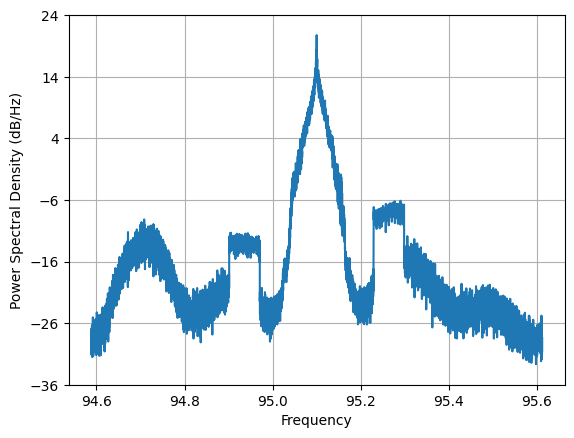

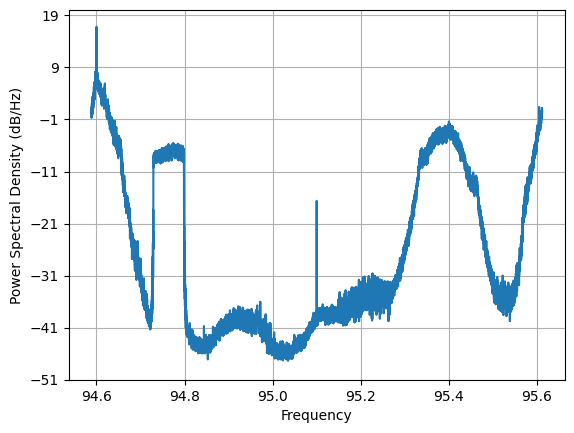

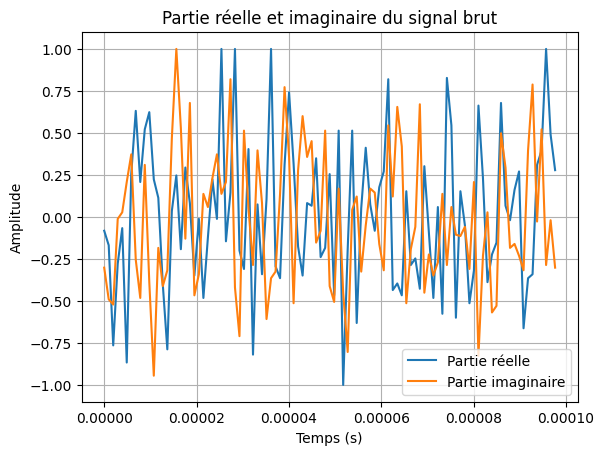

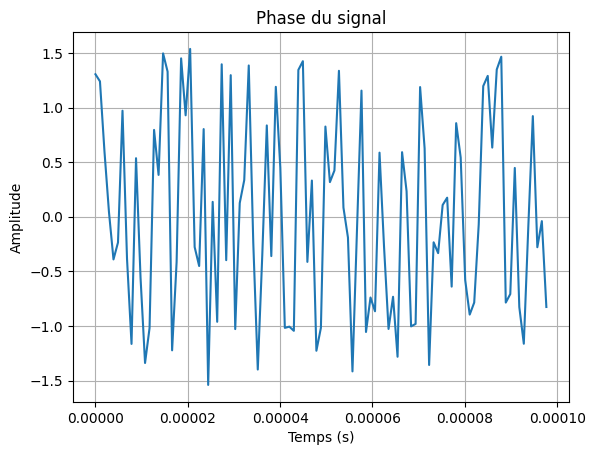

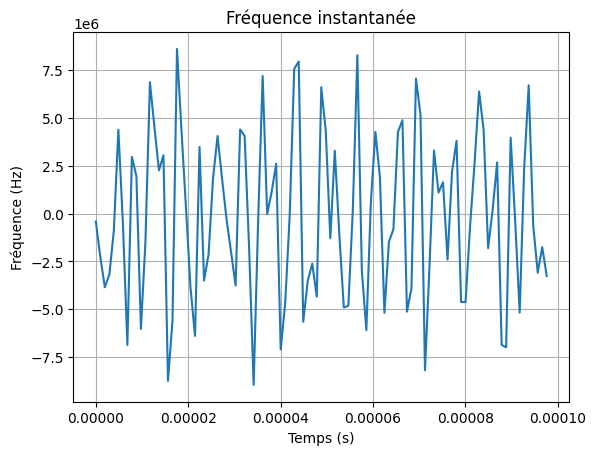

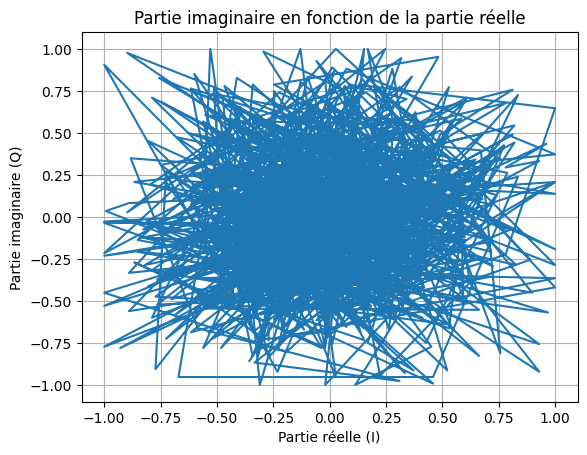

In [168]:
freq_radiocanada = 95100000
samples_RC = Enregistrement(freq_radiocanada,1)
samples_BRUIT = Enregistrement(freq_radiocanada+500000,1)

PSD(samples_RC)
PSD(samples_BRUIT)
BRUT(samples_RC,1,101)
PHASE(samples_RC,1,101)
FREQ_I(samples_RC,1,101)
IQ(samples_RC, 1001)

Modulation du signal audio généré avec la fonction chirp

In [232]:
delta_f = 200000
fs = 1000000
t = np.linspace(0, 2, fs) #Quoi choisir comme temps?
signal_audio = scipy.signal.chirp(t, 0, 0.01, 2000)
integrale = cumtrapz(signal_audio, t, initial=0)
I_signal_FM = np.cos(2 * np.pi * freq_radiocanada * t + 2 * np.pi * delta_f * integrale)
Q_signal_FM = np.sin(2 * np.pi * freq_radiocanada * t + 2 * np.pi * delta_f * integrale)
samples_chirp = I_signal_FM + 1j*Q_signal_FM

Graphiques du signal généré par la fonction chirp

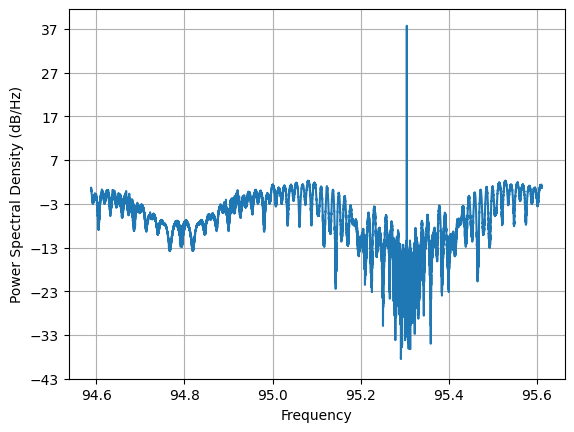

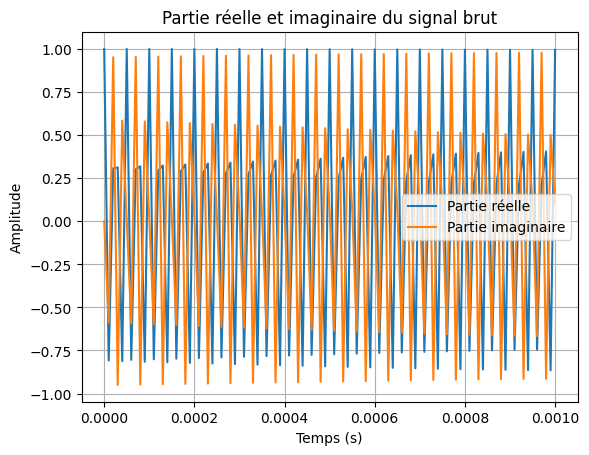

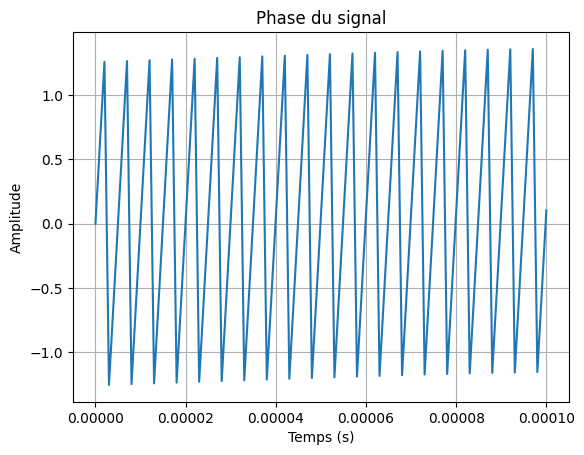

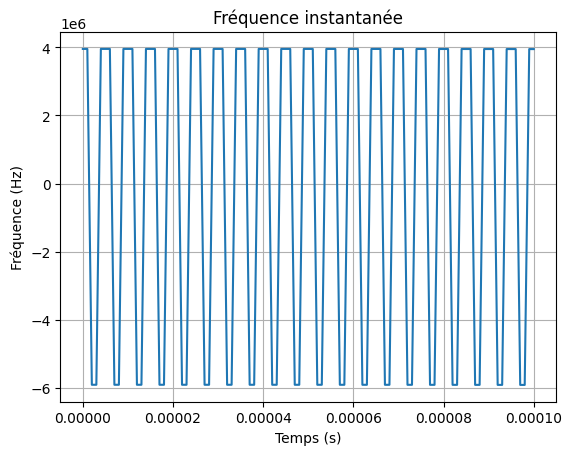

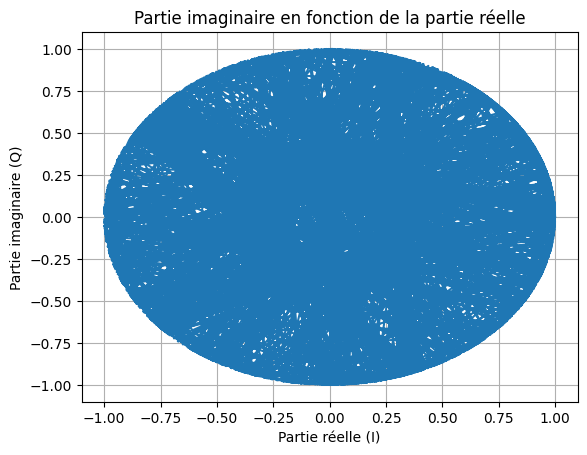

In [233]:
PSD(samples_chirp)
BRUT(samples_chirp,10,101)
PHASE(samples_chirp,1,101)
FREQ_I(samples_chirp,1,101)
IQ(samples_chirp, 1001)

Enregistrement audio

In [167]:
RC = Enregistrement(freq_radiocanada, 10)
Dix_secondes = np.linspace(0,10,len(RC))
real_RC = np.real(RC)
imag_RC = np.imag(RC)
phase_RC = np.arctan(imag_RC/real_RC)
deriveePhase=np.gradient(phase_RC,Dix_secondes)

wavio.write("C:\\Users\\Justine Lejeune\\OneDrive\\Documents\\université\\automne 2024\\TechX\\Radio-FM\\test.wav", deriveePhase,RATE,sampwidth=2)